# TD4 - Explicability

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor, plot_tree,export_text

pd.set_option('display.float_format', lambda x: '%.2f' % x)
color = sns.color_palette("coolwarm", as_cmap=True)

#### Question 1

Our group is formed of : 
- Rémi PELTRIAUX
- Tom SIMON
- Arnaud PY

#### Question 2

We chose the dataset 'Average Time Spent By A User On Social Media' from this kaggle link : https://www.kaggle.com/datasets/imyjoshua/average-time-spent-by-a-user-on-social-media

#### Question 3
Let's import the dataset and analyse it first

In [52]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


Our target variable is "time_spent".

The most important variables to predict it is the age, the platform, the profession, the interests and the income.

We will prove it by first plotting some representations of our dataset

<Axes: >

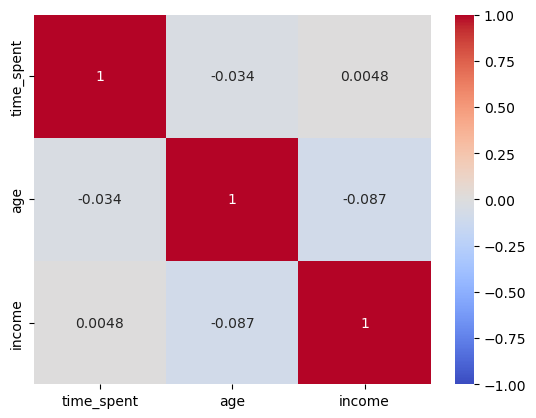

In [53]:
numericalValues = df[["time_spent", "age", "income"]]
correlation = numericalValues.corr()
sns.heatmap(correlation,annot=True,cmap=color,vmin=-1,vmax=1)

At the first see there is not correlation between the age and the time spent on social media. 

Parents are going crazy seing this, let's plot the time spent by age to see if there no bad extrems changing our correlation.

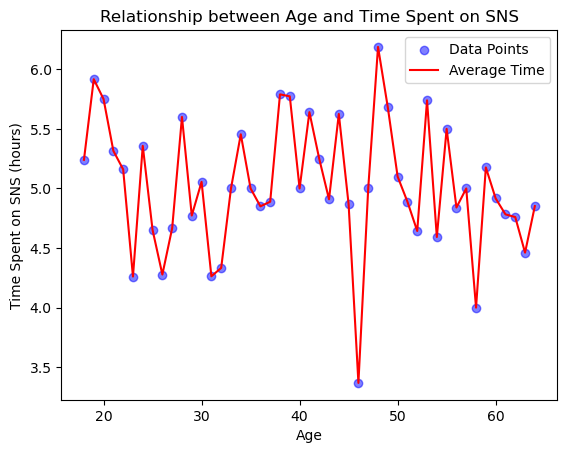

In [54]:
df_age = df.groupby("age")["time_spent"].mean().reset_index()

plt.scatter(df_age["age"], df_age["time_spent"], c='blue', alpha=0.5, label='Data Points')

# Line plot for average time spent by age
plt.plot(df_age['age'], df_age['time_spent'], color='red', linewidth=1.5, label='Average Time')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Time Spent on SNS (hours)')
plt.title('Relationship between Age and Time Spent on SNS')

# Adding legend
plt.legend()

# Display the plot
plt.show()

We can definitely see that there are no correlation between the age and the time spent on social medias

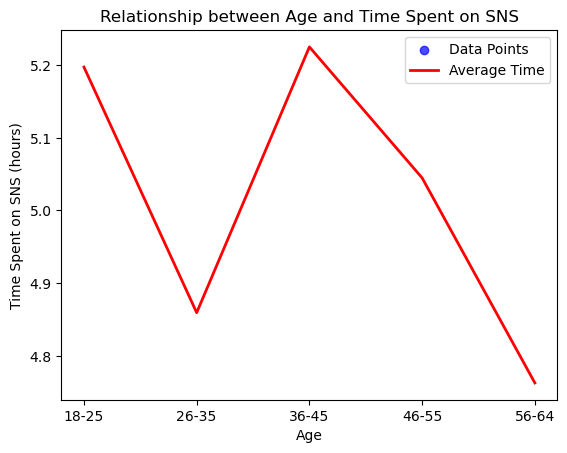

In [55]:
# Define age bins
bins = [18, 25, 35, 45, 55, 64]  # Adjust these bins according to your needs

# Create categories for age using pd.cut
df['Age_Category'] = pd.cut(df['age'], bins=bins, labels=['18-25', '26-35', '36-45', '46-55' ,'56-64'])
# Group by age category and calculate the average time spent
average_time_by_age_category = df.groupby('Age_Category')['time_spent'].mean().reset_index()

# Scatter plot
plt.scatter(df['age'], df['time_spent'], c='blue', alpha=0.7, label='Data Points')

# Line plot for average time spent by age category
plt.plot(
    average_time_by_age_category['Age_Category'],
    average_time_by_age_category['time_spent'],
    color='red',
    linewidth=2,
    label='Average Time'
)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Time Spent on SNS (hours)')
plt.title('Relationship between Age and Time Spent on SNS')

# Adding legend
plt.legend()

# Display the plot
plt.show()

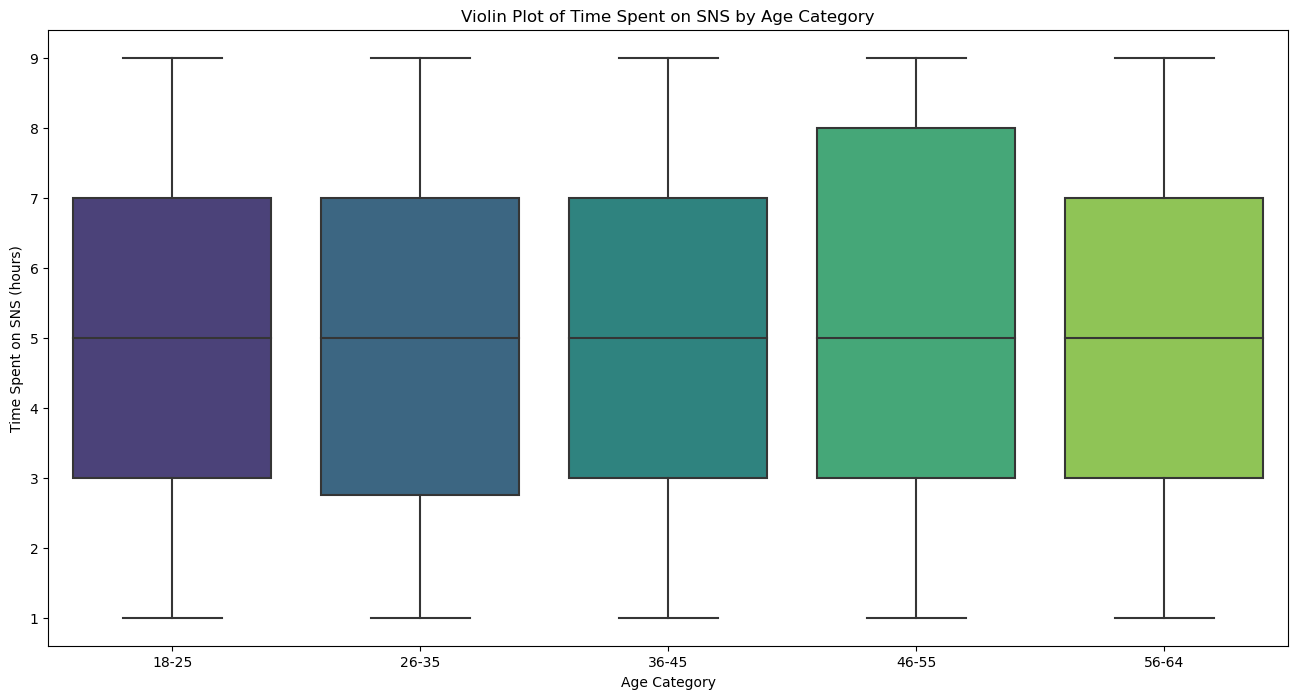

In [56]:
# Set up the figure
plt.figure(figsize=(16, 8))

# Create a violin plot
sns.boxplot(x='Age_Category', y='time_spent', data=df, palette='viridis')

# Adding labels and title
plt.xlabel('Age Category')
plt.ylabel('Time Spent on SNS (hours)')
plt.title('Violin Plot of Time Spent on SNS by Age Category')

# Display the plot
plt.show()

This plot is interesting since the mean was hardly decreasing for the old people categories.

This boxplot shows that almost every category of age is close in term of median. 

Only the 

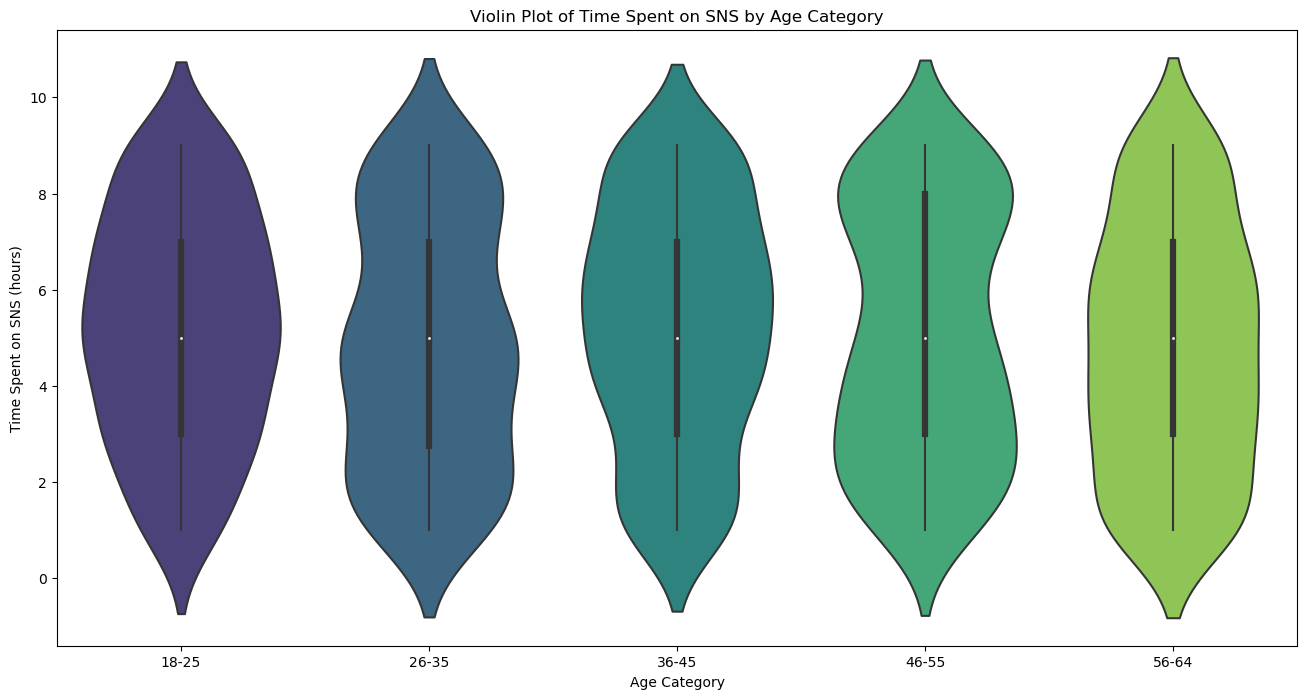

In [57]:
# Set up the figure
plt.figure(figsize=(16, 8))

# Create a violin plot
sns.violinplot(x='Age_Category', y='time_spent', data=df, palette='viridis')

# Adding labels and title
plt.xlabel('Age Category')
plt.ylabel('Time Spent on SNS (hours)')
plt.title('Violin Plot of Time Spent on SNS by Age Category')

# Display the plot
plt.show()